# RFP: Betting on the Bachelor

## Project Overview
You are invited to submit a proposal that answers the following question:

### Who will win season 29 of the Bachelor?

*All proposals must be submitted by **1/15/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you plan on using to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Scrape Fandom Wikis](https://bachelor-nation.fandom.com/wiki/The_Bachelor) or [the official Bachelor website]('https://bachelornation.com/shows/the-bachelor/')
- [Ask ChatGPT to genereate it](https://chatgpt.com/)
- [Read in csv files like this](https://www.kaggle.com/datasets/brianbgonz/the-bachelor-contestants?select=contestants.csv)

*Note, a level 5 dataset contains at least 1000 rows of non-null data. A level 4 contains at least 500 rows of non-null data.*

,Name,Age,Is Older,Age Diff,Occupation,Function,Hometown,City,State,Region,ElimWeek,Season,First_Impression_Rose,Hair Color,Is Blonde,Winner,Height
0,Amanda Marsh,23.0,0.0,8.0,Event Planner,Retail/Services/Entrepreneur,"Chanute, Kansas",Chanute,Kansas,Midwest,7.0,1,0,Blonde,1.0,1.0,68.0
1,Trista Rehn,29.0,0.0,2.0,Miami Heat Dancer,Arts/Entertainment,"Miami, Florida",Miami,Florida,South,6.0,1,0,Blonde,1.0,0.0,NaN
2,Shannon Oliver,24.0,0.0,7.0,Financial Management Consultant,Finance,"Dallas, Texas",Dallas,Texas,South,5.0,1,0,Brown,0.0,0.0,NaN
3,Kim,24.0,0.0,7.0,Nanny,Retail/Services/Entrepreneur,"Tempe, Arizona",Tempe,Arizona,West,4.0,1,0,Blonde,1.0,0.0,NaN
4,Cathy Grimes,22.0,0.0,9.0,Graduate Student,Student,"Terra Haute, Indiana",Terra Haute,Indiana,Midwest,3.0,1,0,Blonde,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Jane Paik,33.0,1.0,5.0,Social Media Director,Corporate,"Los Angeles, California",Los Angeles,California,West,1.0,26,0,Brown,0.0,0.0,NaN
575,Lindsay Dobbs,27.0,0.0,1.0,Neonatal Nurse,Medical,"Warner Robins, Georgia",Warner Robins,Georgia,South,1.0,26,0,Blonde,1.0,0.0,NaN
576,Rianna Hockaday,26.0,0.0,2.0,Registered Nurse,Medical,"Mount Pleasant, Texas",Mount Pleasant,Texas,South,1.0,26,0,Blonde,1.0,0.0,NaN
577,Samantha Jeffries,26.0,0.0,2.0,Occupational Therapist,Medical,"Dayton, Ohio",Dayton,Ohio,Midwest,1.0,26,0,Red,0.0,0.0,NaN


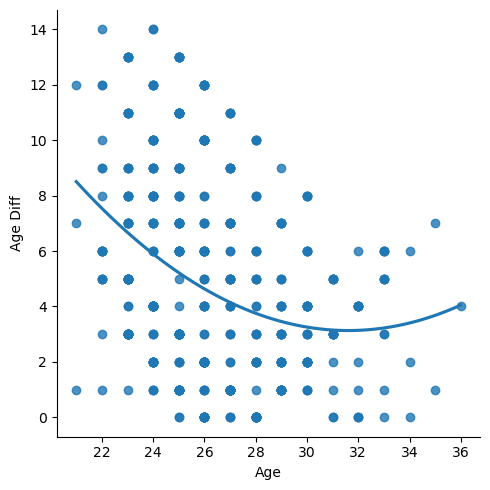

score 0.052601332308953475
[-0.41896854] [15.95058403]


/tmp/ipykernel_64628/694325705.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bach.fillna(method ='ffill', inplace = True)


In [ ]:
# Read data into a dataframe.
# Don't forget to call info()!

import bs4 as bs
#import random
import pandas as pd
import seaborn as sb
import numpy as np
#import datetime
import requests as rq
import pickle
#import json
#import time
#from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

def save_pickle(file, value):
    pickle.dump(value, open(file, "wb"))
def load_pickle(file):
    return pickle.load(open(file, "rb"))


#pages = []
#for x in range(9,29):
#    URL = "https://en.wikipedia.org/wiki/The_Bachelor_(American_TV_series)_season_" + str(x)
#    page = rq.get(URL)
#    pages.append(bs.BeautifulSoup(page.content, "html.parser"))
#    save_pickle("s" + str(x) + ".p", pages)


#seasion = {}
#for x in range(9,29):
#    seasion[x] = load_pickle("s" + str(x) + ".p")

#seasion = load_pickle("seasion.p")

#for x in range(9,29):
#    print(seasion[x])

#for x in load_pickle("s9.p")[0].find_all("table", {"class": "wikitable sortable"})[0].find("tbody").find_all("tr"):

bach = pd.read_csv("bach.csv", encoding='unicode_escape')

display(bach)

sb.lmplot(x ="Age", y ="Age Diff", data = bach, order = 2, ci = None) 
plt.show()

bach.fillna(method ='ffill', inplace = True)

x = np.array(bach['Age']).reshape(-1, 1) 
y = np.array(bach['Age Diff']).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) 

regr = LinearRegression() 



"fit", regr.fit(X_train, y_train)
print("score", regr.score(X_test, y_test)) 

slope = regr.coef_[0]
intercept = regr.intercept_
print(slope, intercept)

#regr.fit(x, y) 
#print(regr.score(x, y)) 



### 2. Training Your Model
In the cell seen below, write the code you need to train a linear regression model. Make sure you display the equation of the plane that best fits your chosen data at the end of your program. 

*Note, level 5 work trains a model using only the standard Python library and Pandas. A level 5 model is trained with at least two features, where one of the features begins as a categorical value (e.g. occupation, hometown, etc.). A level 4 uses external libraries like scikit or numpy.*

In [4]:
# Train model here.
# Don't forget to display the equation of the plane that best fits your data!

### 3. Testing Your Model
In the cell seen below, write the code you need to test your linear regression model. 

*Note, a model is considered a level 5 if it achieves at least 60% prediction accuracy or achieves an RMSE of 2 weeks or less.*

In [2]:
# Test model here.

### 4. Final Answer

In the first cell seen below, state the name of your predicted winner. 
In the second cell seen below, justify your prediction using an evaluation technique like RMSE or percent accuracy.

#### State the name of your predicted winner here.

#### Justify your prediction here.